In [43]:
from itertools import cycle

from unidip import UniDip
import numpy as np
import pandas as pd
from Bio import motifs
from util import *

import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [10]:
# Poly A
labs, strings = gen_mut_strs("AAAAAAAAAAAAAAA", 1, 20, 100)
seqs = motifs.create(strings)

In [15]:
# Multi let
labs, strings = gen_mut_strs("ACTGTGCACGTGACG", 1, 20, 100)
seqs = motifs.create(strings)

In [38]:
# Degenerate
labs, strings = gen_mut_strs("ACTGTGCACGTGACG", 1, 20, 215, mutate_num=15)
seqs = motifs.create(strings)

In [6]:
# mis-aligned
labs, strings = gen_mut_strs("ACTGTGCACGTGACG", 1, 20, 100, min_offset=0, max_offset=80, mutate_number=0)
seqs = motifs.create(strings)

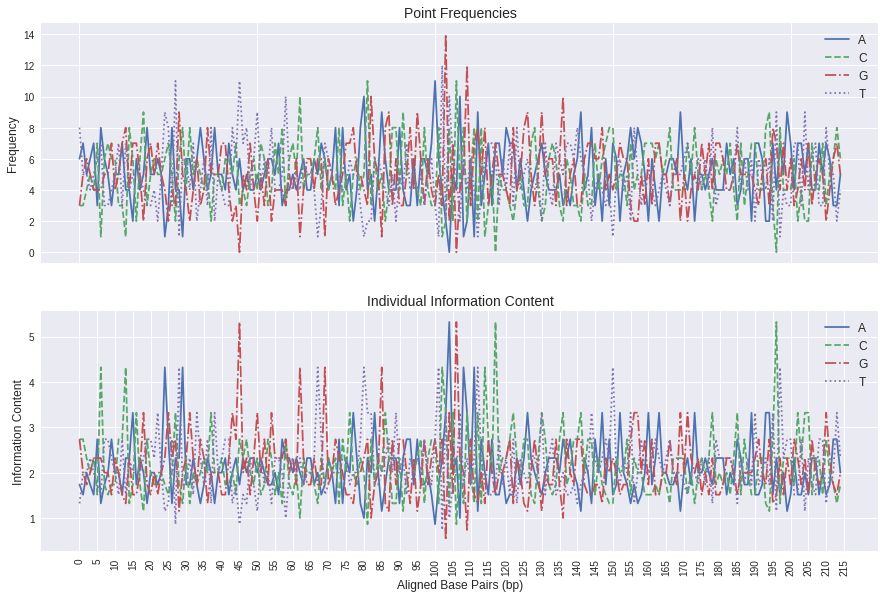

In [39]:
plt.figure(figsize=[15, 15])
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

# Frequency Counts
cts = seqs.counts

ax1 = plt.subplot('311')
for let in "ACGT":
    plt.plot(cts[let], label=let, ls=next(linecycler))
plt.title("Point Frequencies", fontsize=14)
plt.ylabel("Frequency", fontsize=12)
# plt.xlabel("Aligned Base Pairs (bp)", fontsize=12)
# plt.xticks(range(0,len(strings[0])+1,5), rotation='vertical')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(fontsize=12)

# information content
ic = pd.DataFrame(cts).apply(getInfoCntnt, 1)

plt.subplot('312')
for col in ic:
    plt.plot(ic[col], label=col, ls=next(linecycler))
plt.title("Individual Information Content", fontsize=14)
plt.ylabel("Information Content", fontsize=12)
plt.xlabel("Aligned Base Pairs (bp)", fontsize=12)
plt.xticks(range(0,len(strings[0])+1,5), rotation='vertical')
plt.legend(ic.columns.values, fontsize=12)

plt.show()

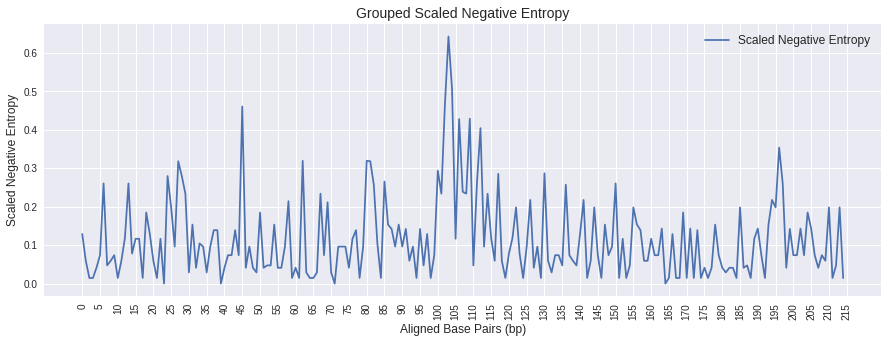

In [47]:
# negative scaled entropy
nent = pd.DataFrame(cts).apply(lambda x: 2-shannonEntropy(x), 1) 

plt.figure(figsize=[15, 5])
# plt.subplot('313')
plt.plot(nent, label="Scaled Negative Entropy")
plt.title("Grouped Scaled Negative Entropy", fontsize=14)
plt.ylabel("Scaled Negative Entropy", fontsize=12)
plt.xlabel("Aligned Base Pairs (bp)", fontsize=12)
plt.xticks(range(0,len(strings[0])+1,5), rotation='vertical')
plt.legend(fontsize=12)

plt.show()

In [41]:
uni = UniDip(np.array(nent), is_hist=True)
res = uni.run()
print(len(res))
print(res)
if len(res) == 1:
    res = [uni._get_full_interval(res[0])]
print(len(res))
print(res)



1
[(0, 214)]
1
[(80, 117)]


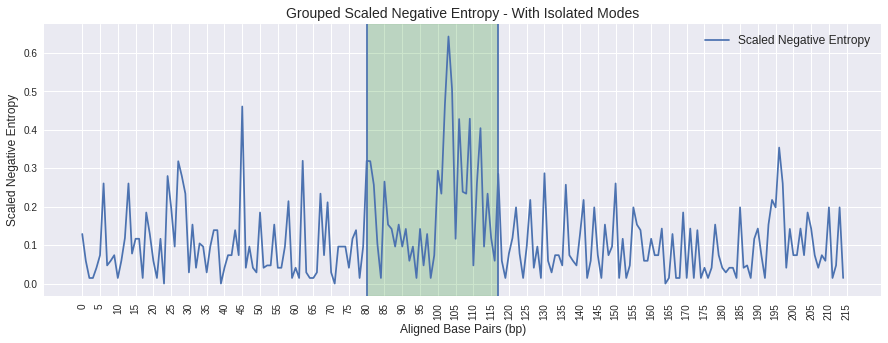

In [45]:
fig, ax = plt.subplots(1,1, figsize=[15, 5])
plt.plot(nent, label="Scaled Negative Entropy")
plt.title("Grouped Scaled Negative Entropy - With Isolated Modes", fontsize=14)
plt.ylabel("Scaled Negative Entropy", fontsize=12)
plt.xlabel("Aligned Base Pairs (bp)", fontsize=12)
for lo, hi in res:
    plt.axvline(lo)
    plt.axvline(hi)
    plt.axvspan(lo, hi, color='green', alpha=0.2)
plt.xticks(range(0,len(strings[0])+1,5), rotation='vertical')
plt.legend(fontsize=12)
plt.show()